In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime

from valueinvesting import utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
evaluate_last_X_years = True
X=10
currency_pair = 'JPY=X'
numbers_in_currency = 'JPY'
share_name = '6645.T'

# 1.1 Calculate Share numbers from total distributed dividend (CFS) and dividend amount

# 1.2. Raw input statement data

In [3]:
route = f"../data/input/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

In [4]:
owned_shares = pd.read_csv('../data/extras/owned_stocks.csv', sep=';', parse_dates=['date'])
owned_shares = owned_shares.loc[(owned_shares['stock'] == share_name) & (owned_shares['active'] == 'yes')]

## (OPTIONAL) Time Filtering - Last 7 years daat

In [5]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,curr_assets,goodwill,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,shares
0,2013-12-31,192667,-116654,76013,10852,79966,158679,114750,388833,0,...,645315,81129,9136,0,161155,0,218591,14808,-9048,220.09
1,2014-03-31,220573,-137190,83383,11688,90251,172404,97677,396493,0,...,654704,85218,488,0,162707,0,224195,30475,-9595,217.25
2,2014-06-30,197219,-118946,78273,14985,101957,158599,102798,397063,0,...,643041,82029,30,0,147113,0,205386,21457,-7148,217.25
3,2014-09-30,207235,-124922,82313,16504,105361,166657,115394,423912,0,...,675252,89389,0,0,165097,0,210009,8011,-7879,217.25
4,2014-12-31,209815,-126522,83293,14393,83132,171604,131643,428056,0,...,703797,91380,147,0,165830,0,214599,13158,-10545,217.25


## Calculate date when quaterly reports could be available

In [6]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [7]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
36,2022-12-31,2023-02-11,200.88,233559,-128214,105345,23014,87564,158301,187445,...,0,944462,97248,0,0,188182,0,235536,1188,-10237
37,2023-03-31,2023-04-21,198.45,238105,-130999,107106,21879,105279,179205,173926,...,0,998160,92855,213,0,210020,0,269687,33214,-17035
38,2023-06-30,2023-07-21,198.45,203351,-112801,90550,14138,97711,158379,191416,...,0,1011839,85273,1786,0,184707,0,244305,7854,-9215
39,2023-09-30,2023-10-21,198.45,197323,-115836,81487,3605,107715,151572,190058,...,0,1010785,80283,1207,0,190415,0,249525,17878,-9605
40,2023-12-31,2024-02-11,198.45,207311,-121174,86137,4514,129311,152886,187964,...,104395,1284432,86773,87325,3151,278388,10248,531316,6119,-11958


## Pull historical average USD national currency rates and add to the dataframe

In [8]:
if currency_pair != 'USD=X':
    data['usd_nat_currency'] = utils.daily_price(
        ticker=currency_pair,
        end=data['date'],
        days_earlier=90
        )
else:
    data['usd_nat_currency'] = [1 for x in range(len(data))]

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
36,2022-12-31,2023-02-11,200.88,233559,-128214,105345,23014,87564,158301,187445,...,944462,97248,0,0,188182,0,235536,1188,-10237,141.446907
37,2023-03-31,2023-04-21,198.45,238105,-130999,107106,21879,105279,179205,173926,...,998160,92855,213,0,210020,0,269687,33214,-17035,132.309110
38,2023-06-30,2023-07-21,198.45,203351,-112801,90550,14138,97711,158379,191416,...,1011839,85273,1786,0,184707,0,244305,7854,-9215,137.154142
39,2023-09-30,2023-10-21,198.45,197323,-115836,81487,3605,107715,151572,190058,...,1010785,80283,1207,0,190415,0,249525,17878,-9605,144.478662
40,2023-12-31,2024-02-11,198.45,207311,-121174,86137,4514,129311,152886,187964,...,1284432,86773,87325,3151,278388,10248,531316,6119,-11958,147.876384


## Convert USD values related to IS, BS, CFS to national currency

In [9]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
36,2022-12-31,2023-02-11,200.88,233559,-128214,105345,23014,87564,158301,187445,...,944462,97248,0,0,188182,0,235536,1188,-10237,141.446907
37,2023-03-31,2023-04-21,198.45,238105,-130999,107106,21879,105279,179205,173926,...,998160,92855,213,0,210020,0,269687,33214,-17035,132.309110
38,2023-06-30,2023-07-21,198.45,203351,-112801,90550,14138,97711,158379,191416,...,1011839,85273,1786,0,184707,0,244305,7854,-9215,137.154142
39,2023-09-30,2023-10-21,198.45,197323,-115836,81487,3605,107715,151572,190058,...,1010785,80283,1207,0,190415,0,249525,17878,-9605,144.478662
40,2023-12-31,2024-02-11,198.45,207311,-121174,86137,4514,129311,152886,187964,...,1284432,86773,87325,3151,278388,10248,531316,6119,-11958,147.876384


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [10]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [11]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

## Calculate performance parameters (current ratio, ROA, ROE, margins, D/E)

In [12]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data

In [13]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2014-02-17,3693.681152,2013-12-31,192667.0,197.228407,1938.861375,220.09,95424.0,433.568086,79966.0,...,0.661265,0.338735,4.856774,5.751532,9.637446,4.06637,0.39453,0.056325,0.067266,0.101724
1,2014-02-24,3680.765381,2013-12-31,192667.0,197.228407,1938.861375,220.09,95424.0,433.568086,79966.0,...,0.661265,0.338735,4.856774,5.751532,9.637446,4.06637,0.39453,0.056325,0.067266,0.101724
2,2014-03-03,3766.865479,2013-12-31,192667.0,197.228407,1938.861375,220.09,95424.0,433.568086,79966.0,...,0.661265,0.338735,4.856774,5.751532,9.637446,4.06637,0.39453,0.056325,0.067266,0.101724
3,2014-03-10,3465.516602,2013-12-31,192667.0,197.228407,1938.861375,220.09,95424.0,433.568086,79966.0,...,0.661265,0.338735,4.856774,5.751532,9.637446,4.06637,0.39453,0.056325,0.067266,0.101724
4,2014-03-17,3271.791260,2013-12-31,192667.0,197.228407,1938.861375,220.09,95424.0,433.568086,79966.0,...,0.661265,0.338735,4.856774,5.751532,9.637446,4.06637,0.39453,0.056325,0.067266,0.101724


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [14]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2014-02-17,3693.681152,2013-12-31,192667.0,197.228407,1938.861375,220.09,95424.0,433.568086,79966.0,...,4.06637,0.39453,0.056325,0.067266,0.101724,18.727937,1.905077,1.054854,1.234730,8.519264
1,2014-02-24,3680.765381,2013-12-31,192667.0,197.228407,1938.861375,220.09,95424.0,433.568086,79966.0,...,4.06637,0.39453,0.056325,0.067266,0.101724,18.662451,1.898416,1.051166,1.231042,8.489475
2,2014-03-03,3766.865479,2013-12-31,192667.0,197.228407,1938.861375,220.09,95424.0,433.568086,79966.0,...,4.06637,0.39453,0.056325,0.067266,0.101724,19.099001,1.942824,1.075754,1.255631,8.688060
3,2014-03-10,3465.516602,2013-12-31,192667.0,197.228407,1938.861375,220.09,95424.0,433.568086,79966.0,...,4.06637,0.39453,0.056325,0.067266,0.101724,17.571082,1.787398,0.989694,1.169570,7.993016
4,2014-03-17,3271.791260,2013-12-31,192667.0,197.228407,1938.861375,220.09,95424.0,433.568086,79966.0,...,4.06637,0.39453,0.056325,0.067266,0.101724,16.588844,1.687481,0.934369,1.114246,7.546199


# Calculate Dividend yield and currency-share price correlation

In [15]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

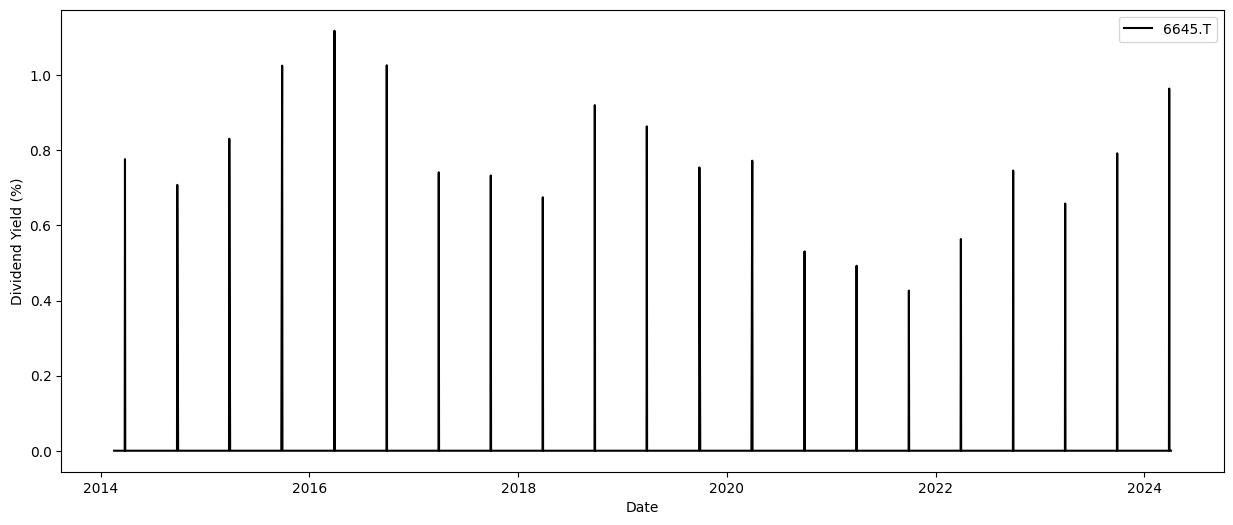

In [16]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate    0.226851
share_price      1.000000
Name: share_price, dtype: float64


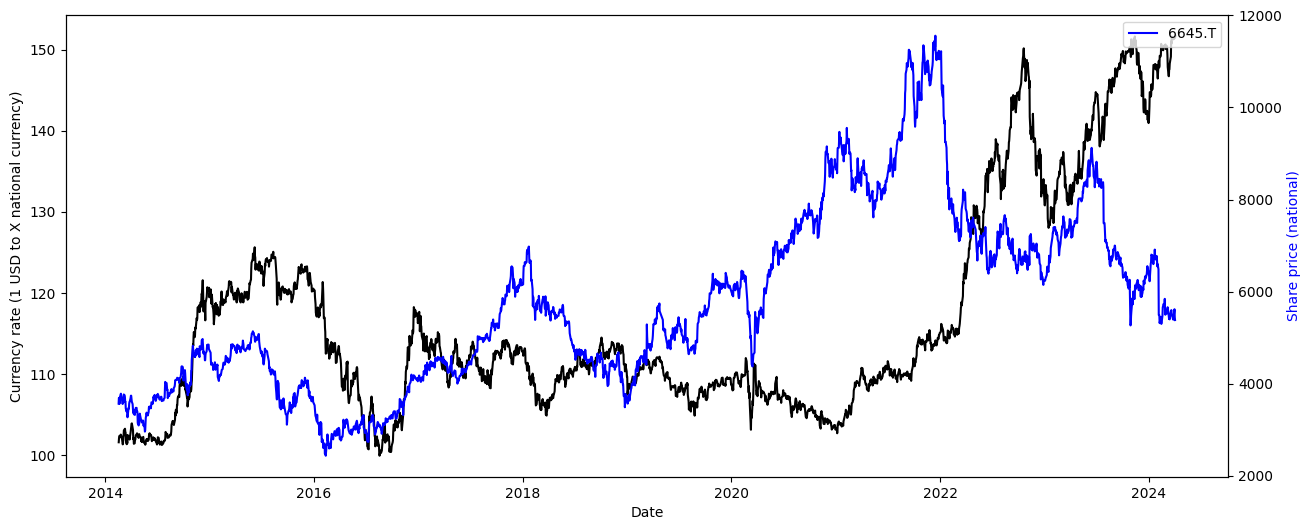

In [17]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

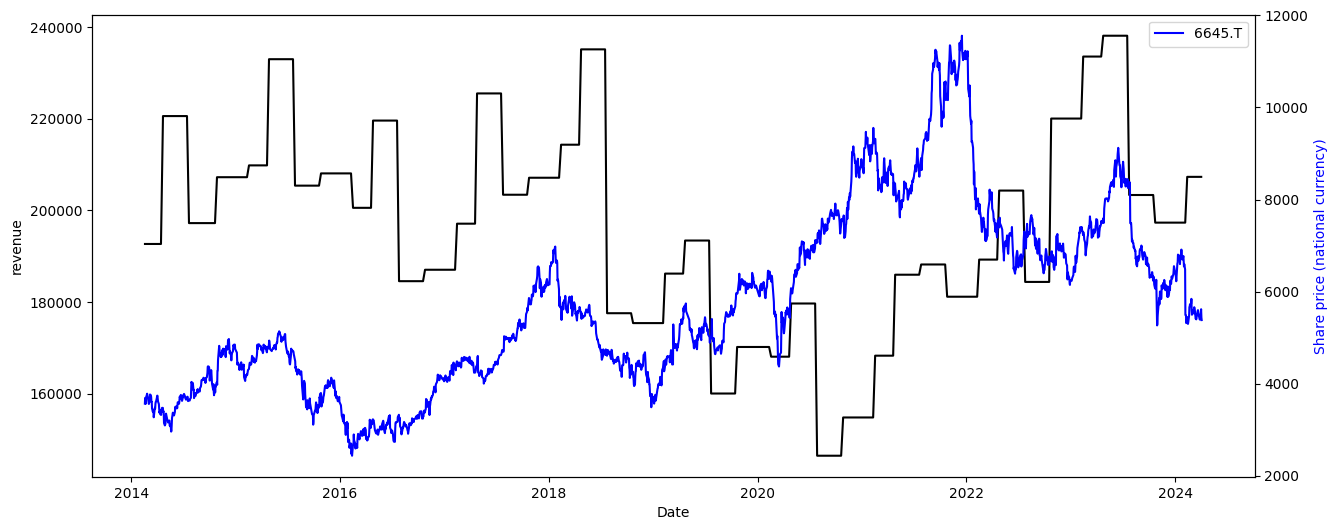

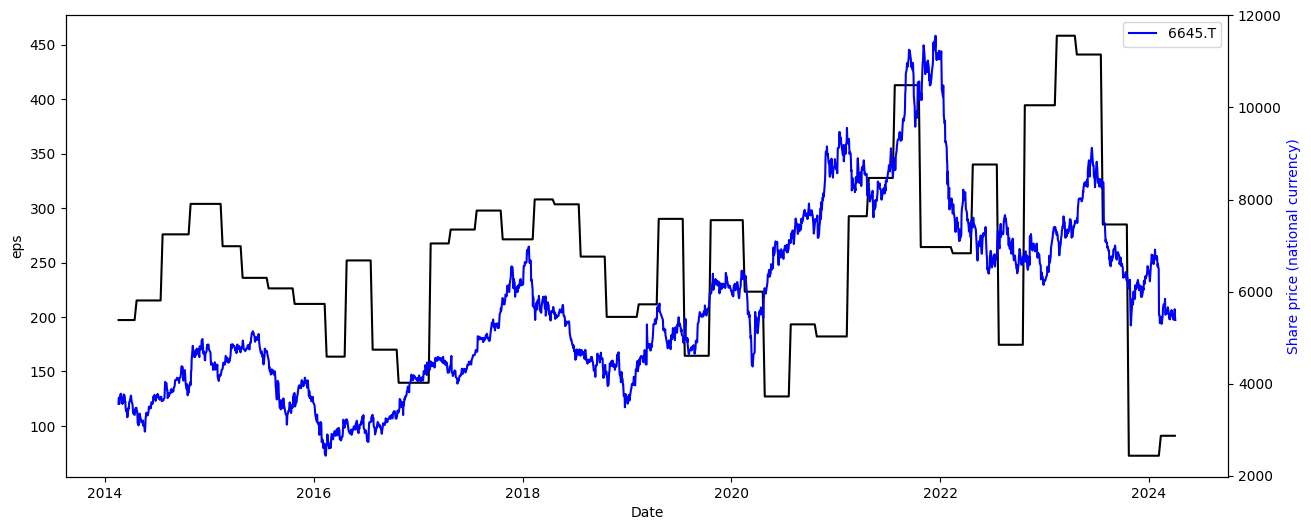

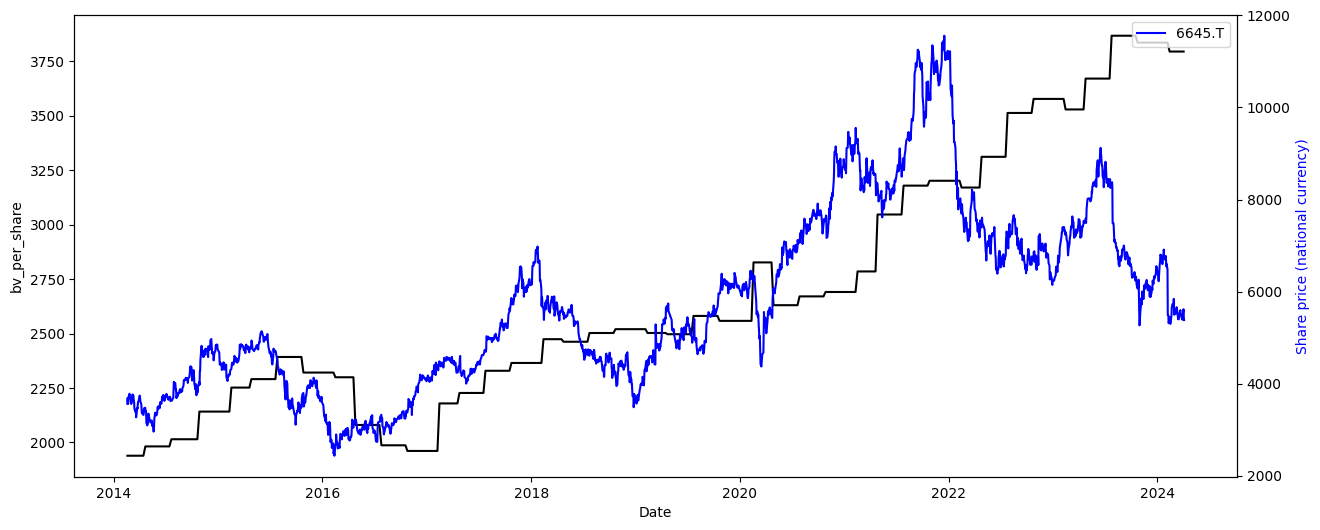

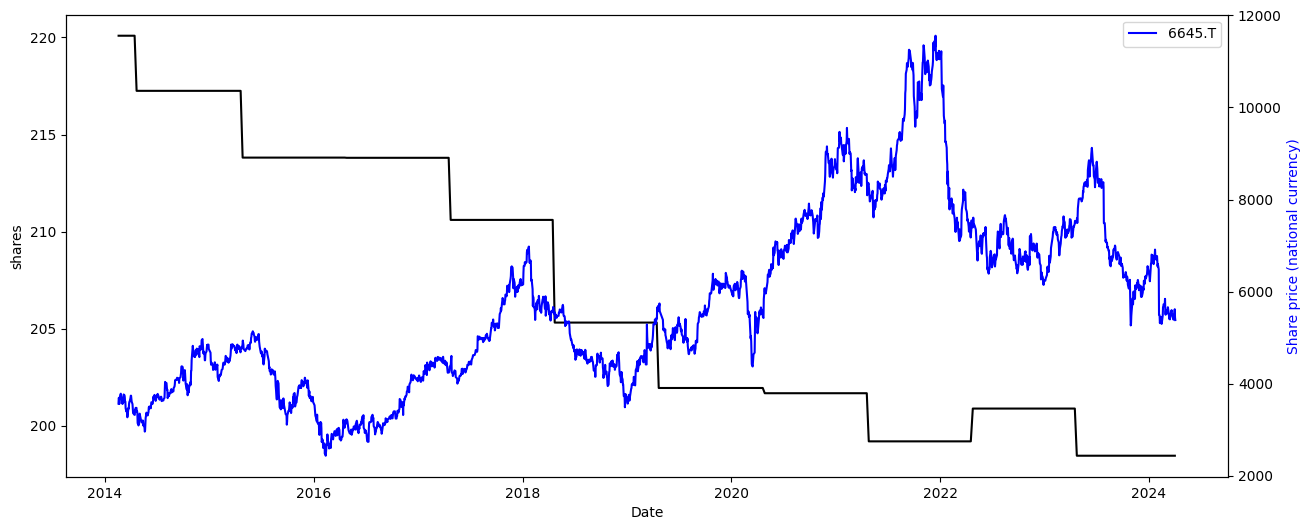

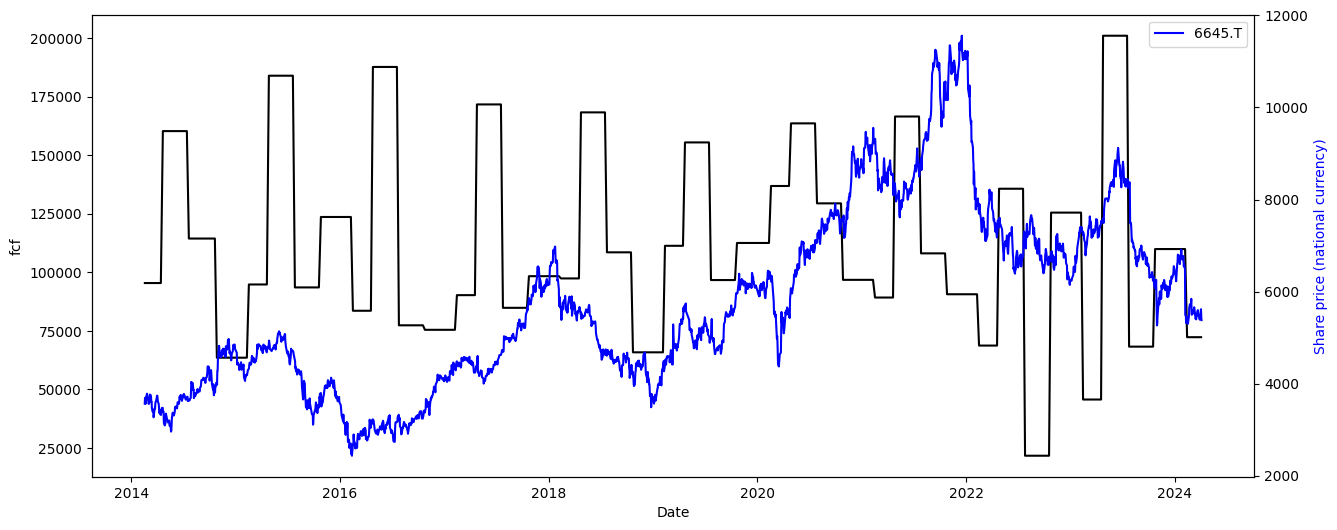

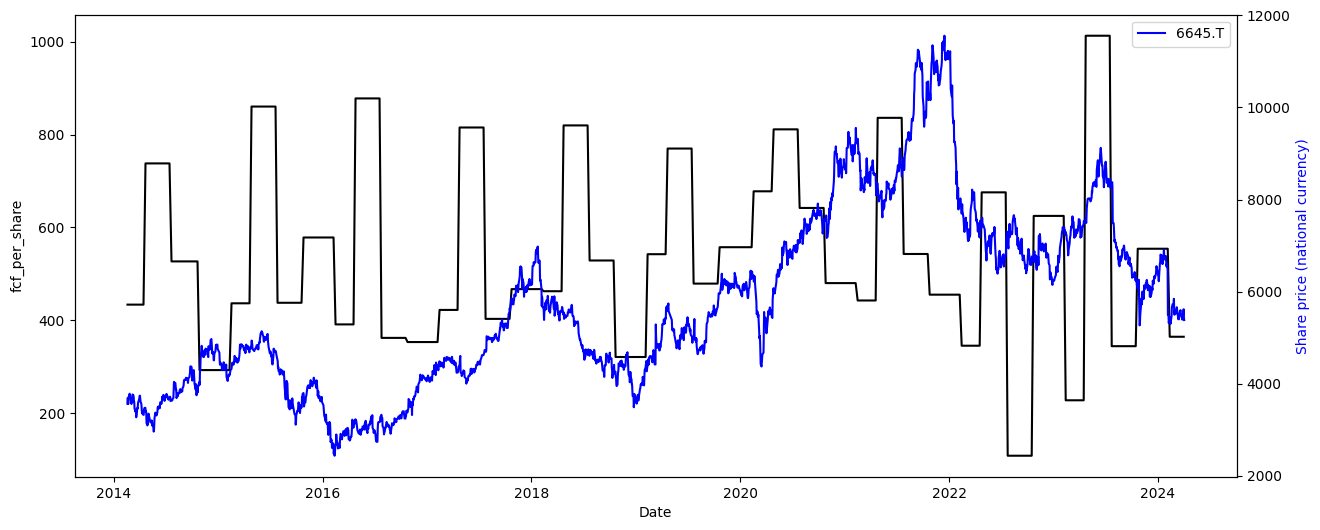

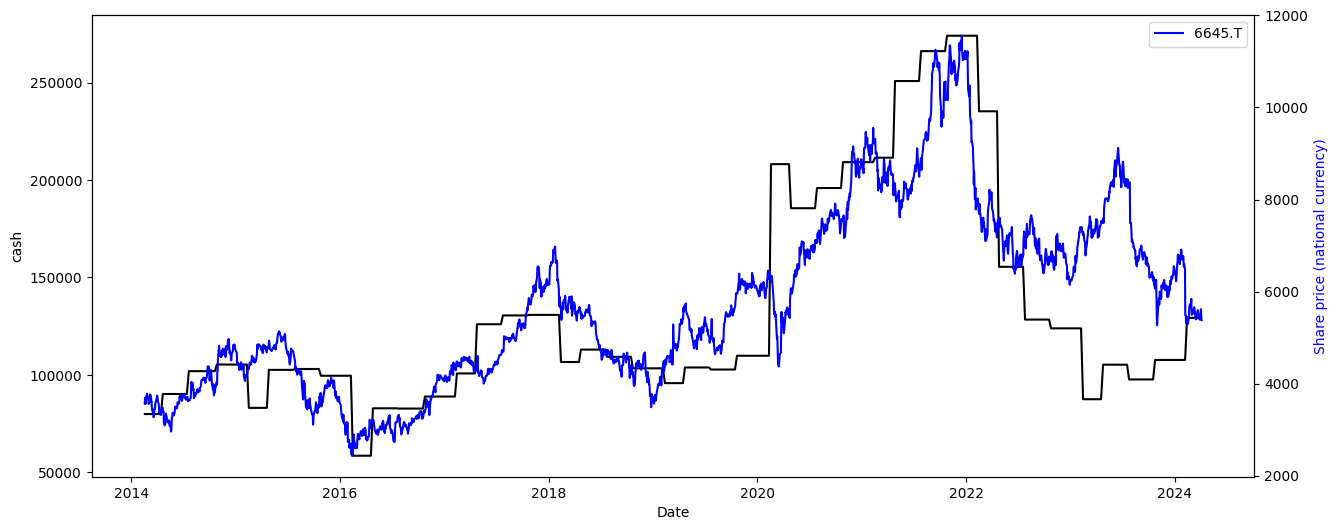

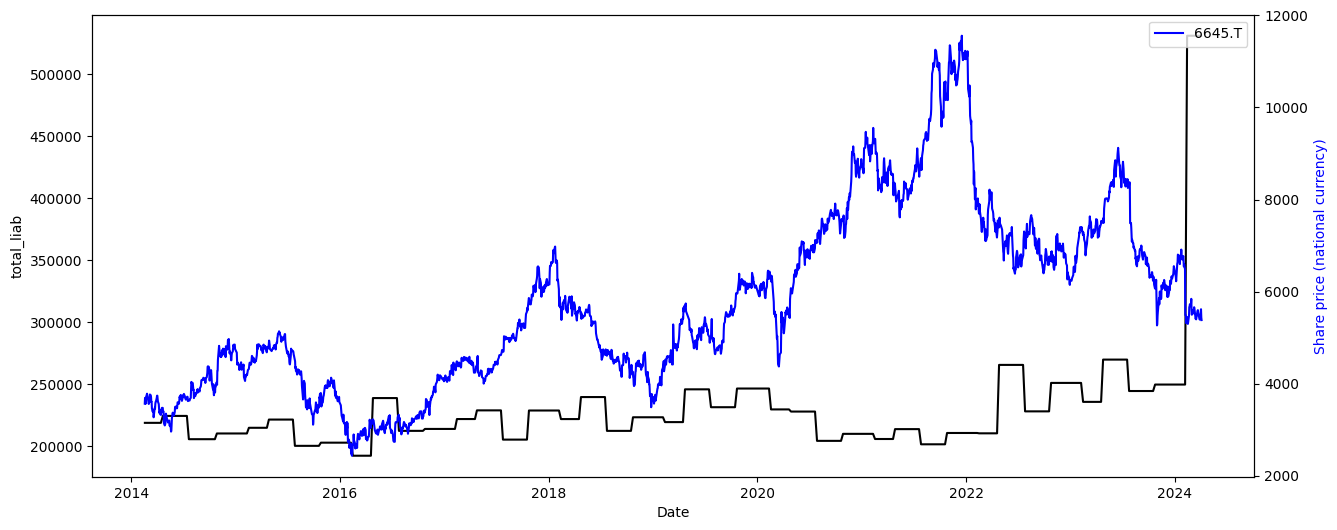

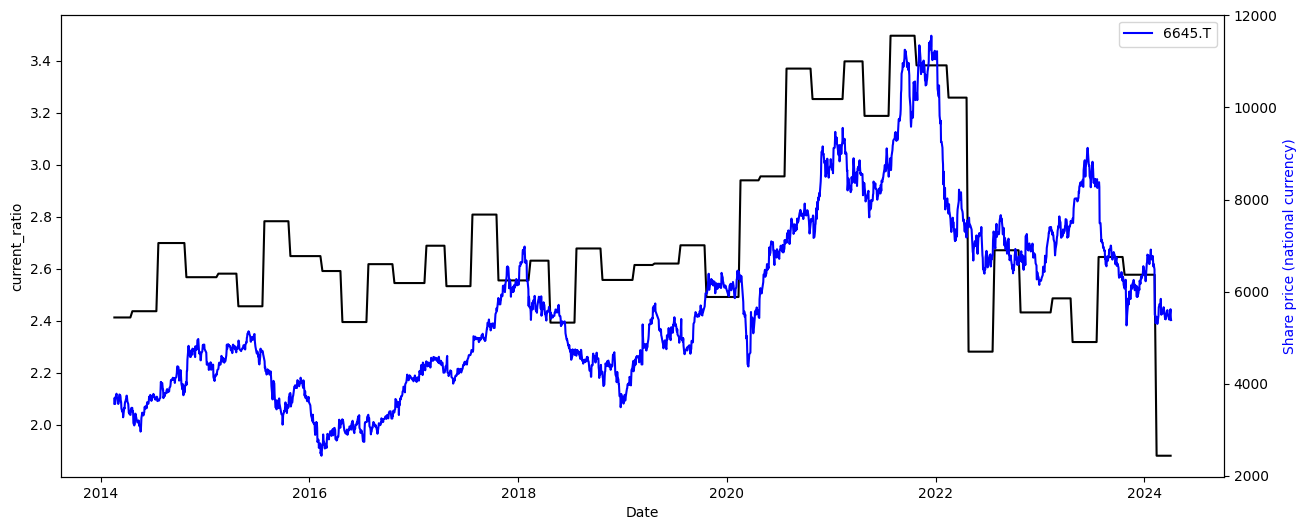

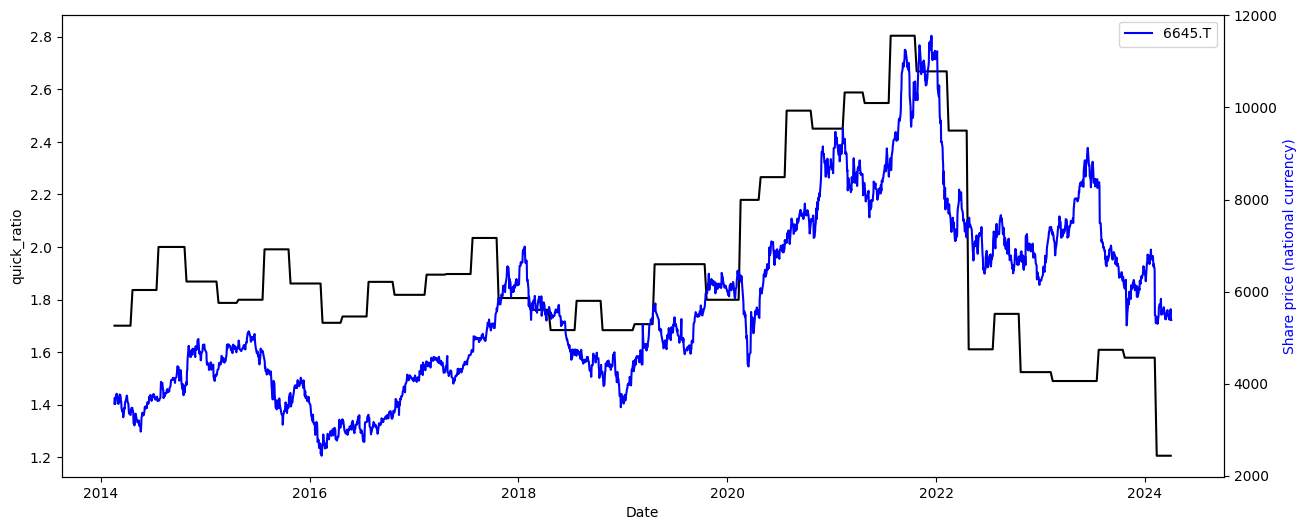

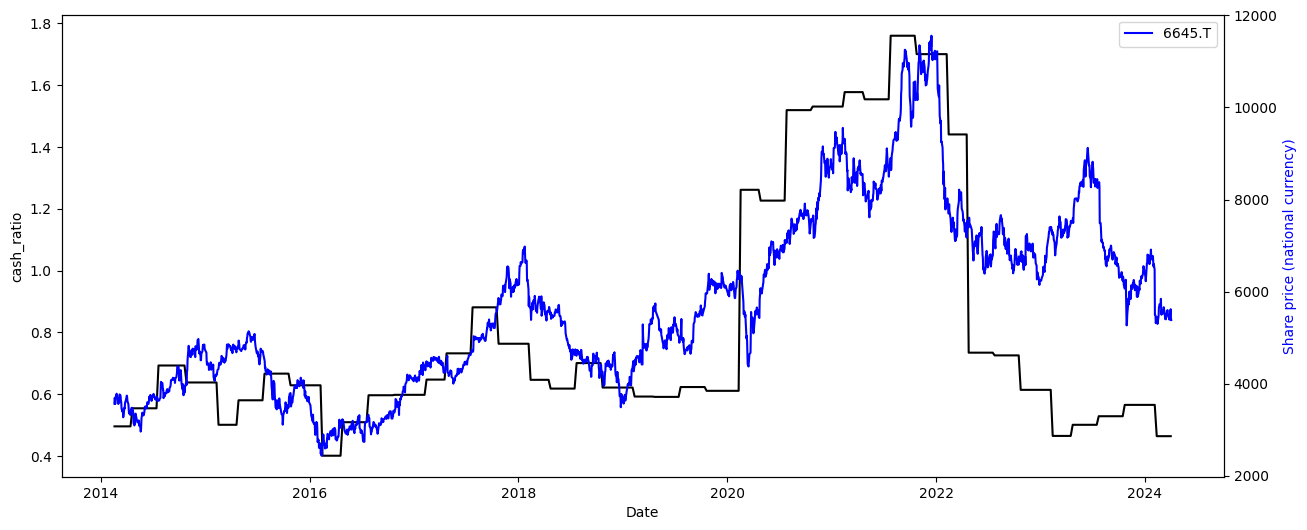

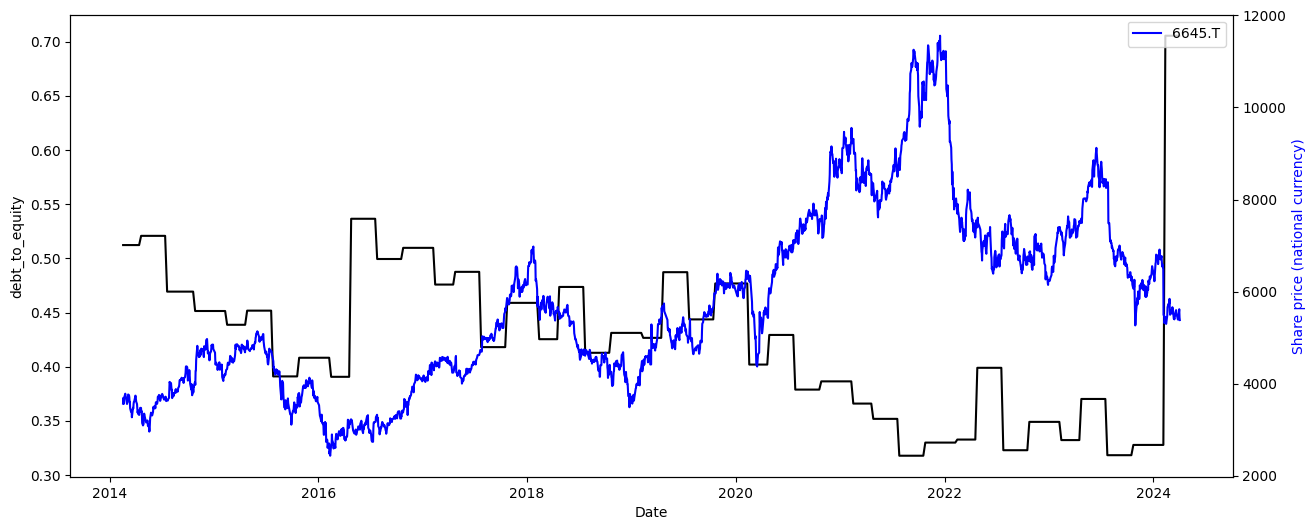

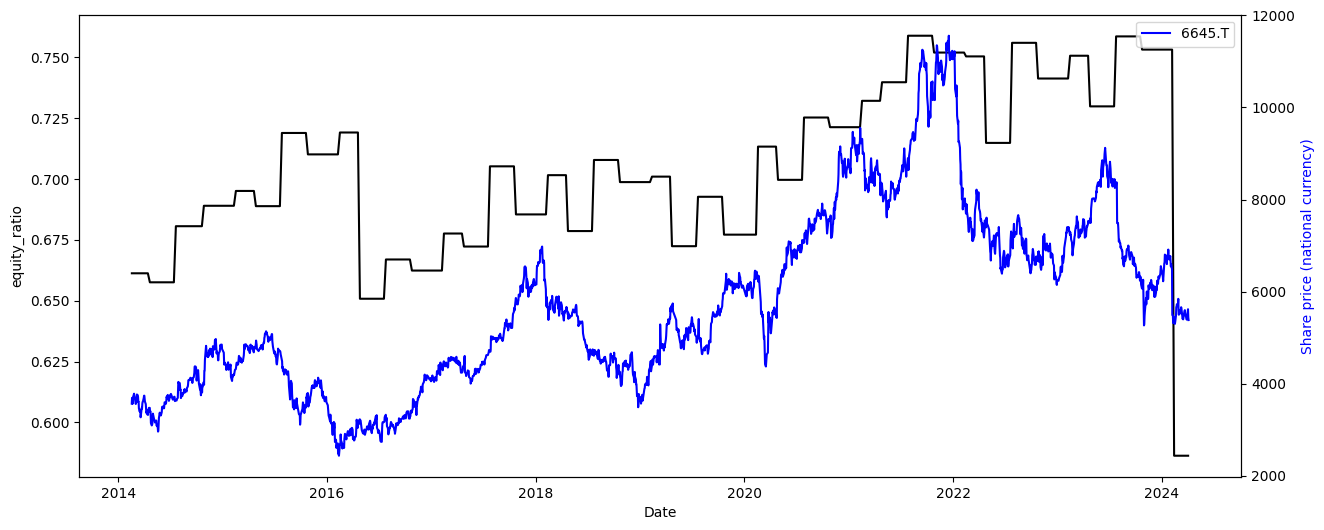

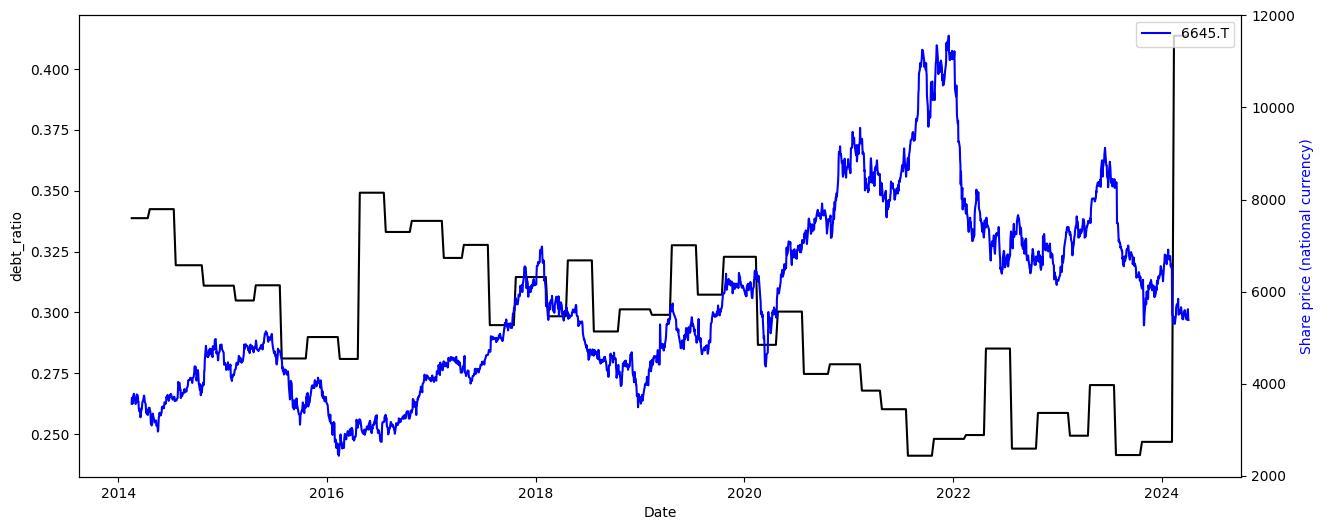

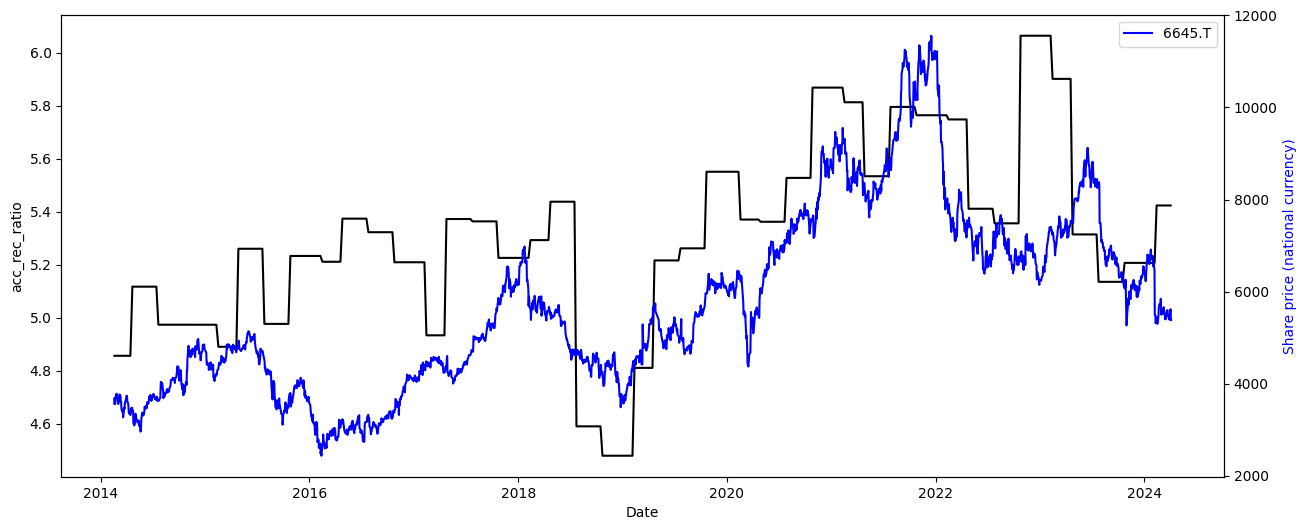

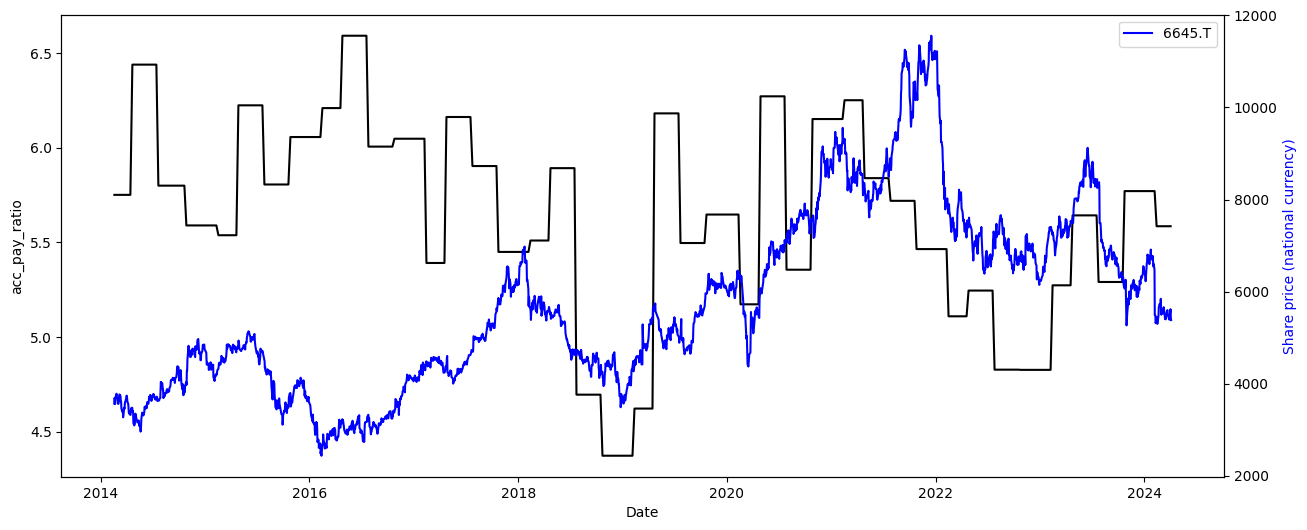

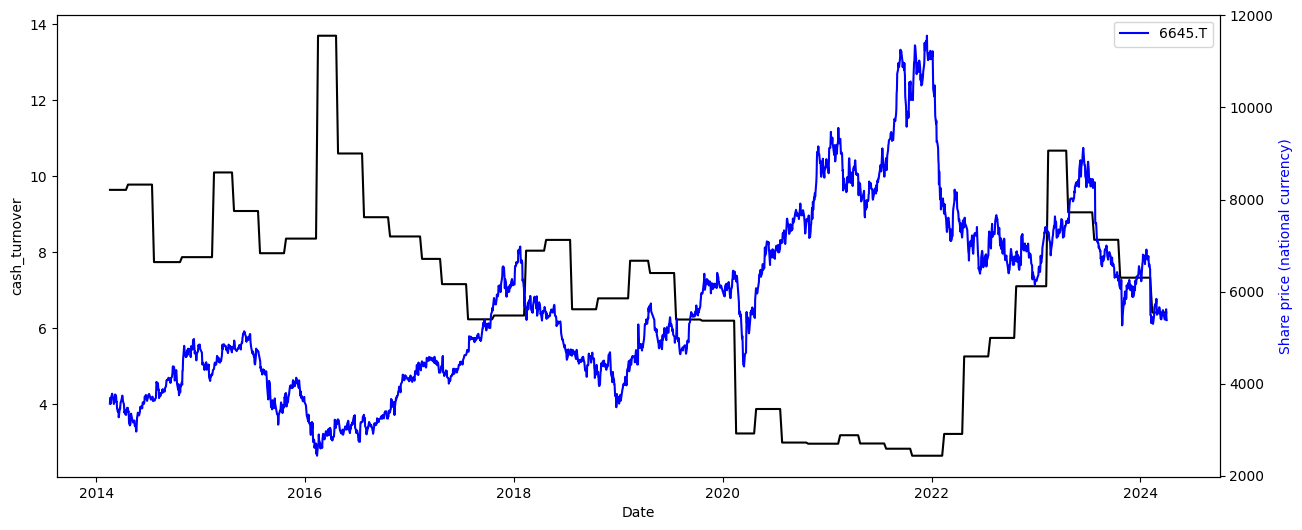

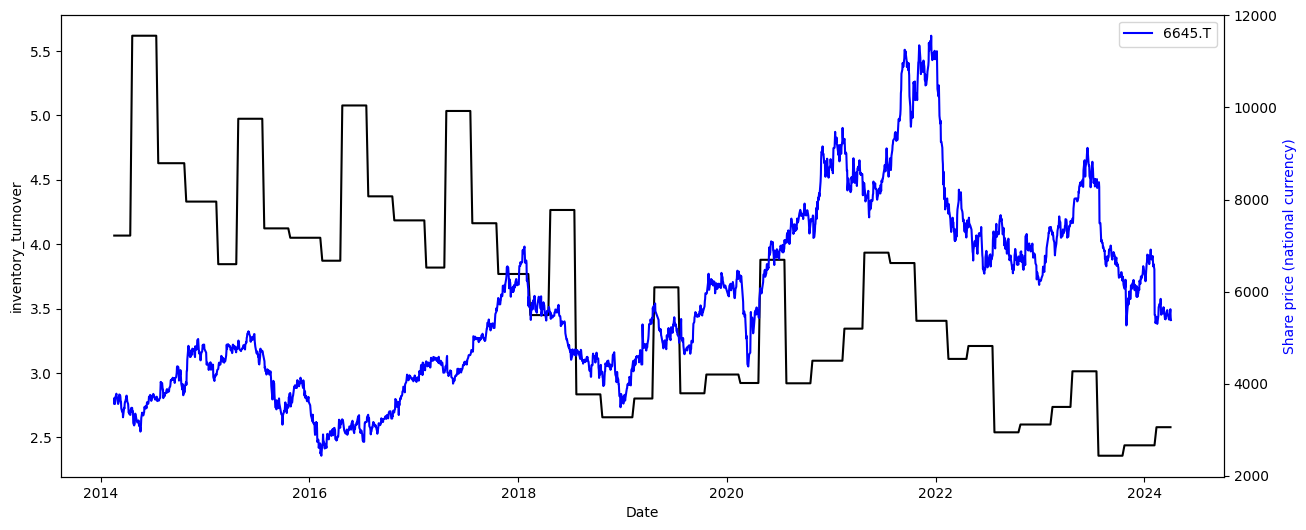

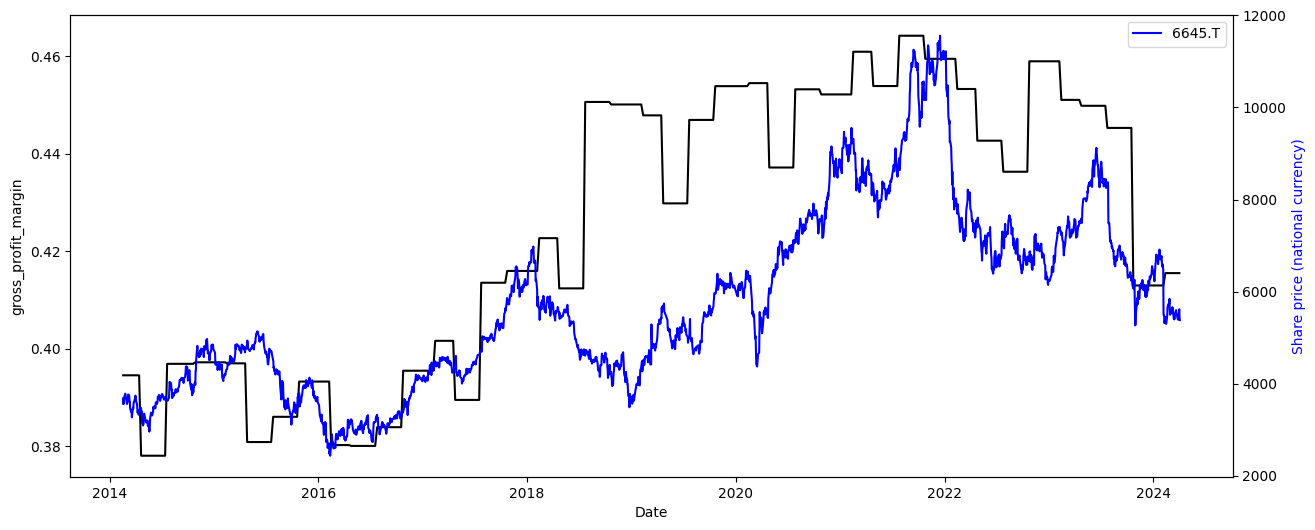

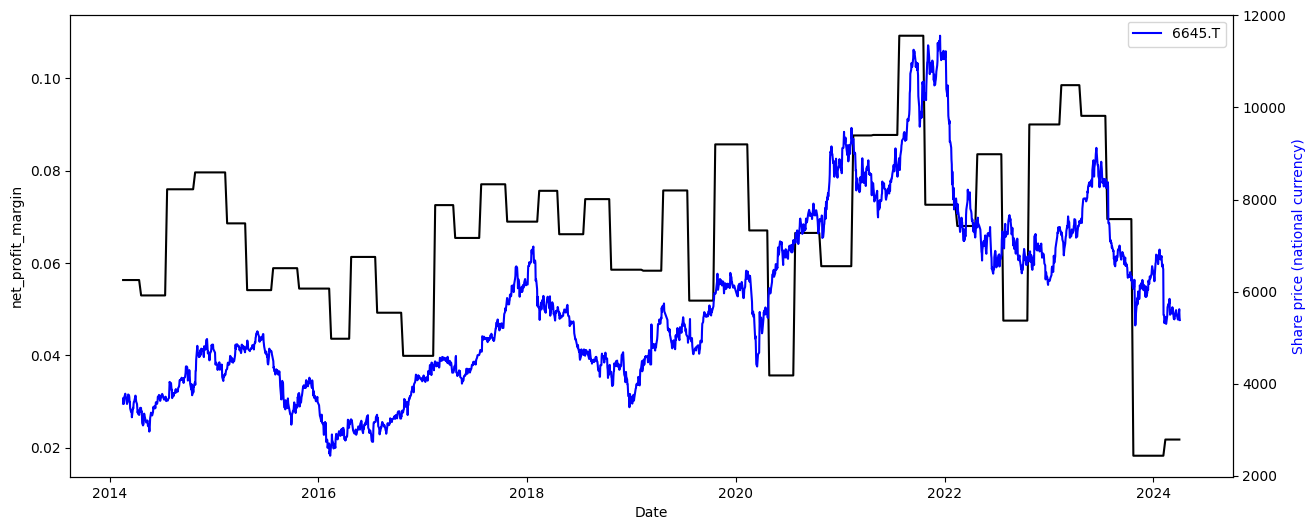

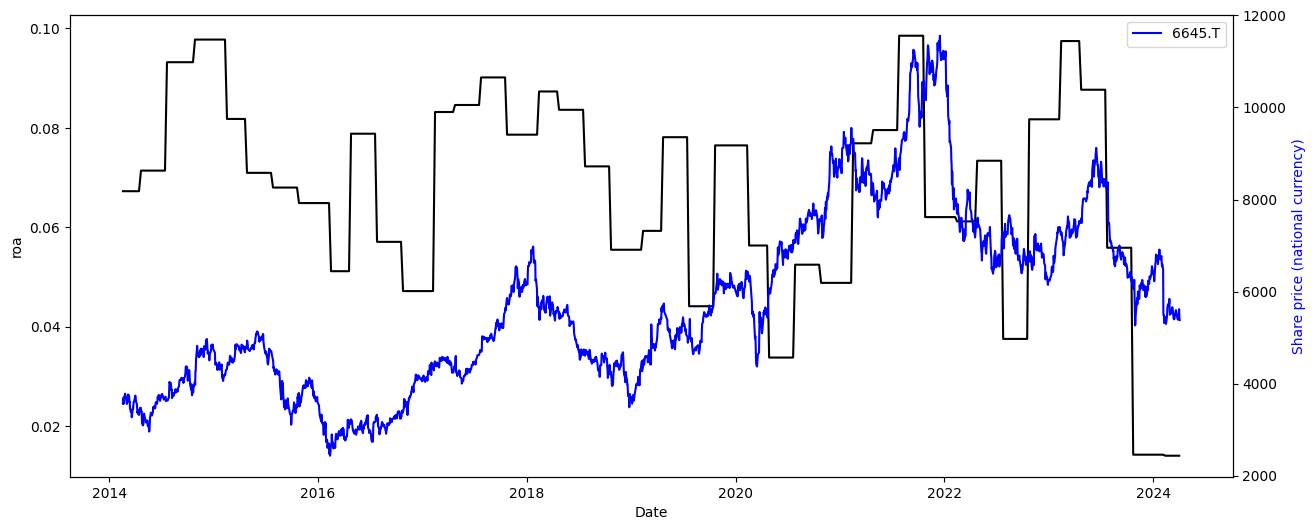

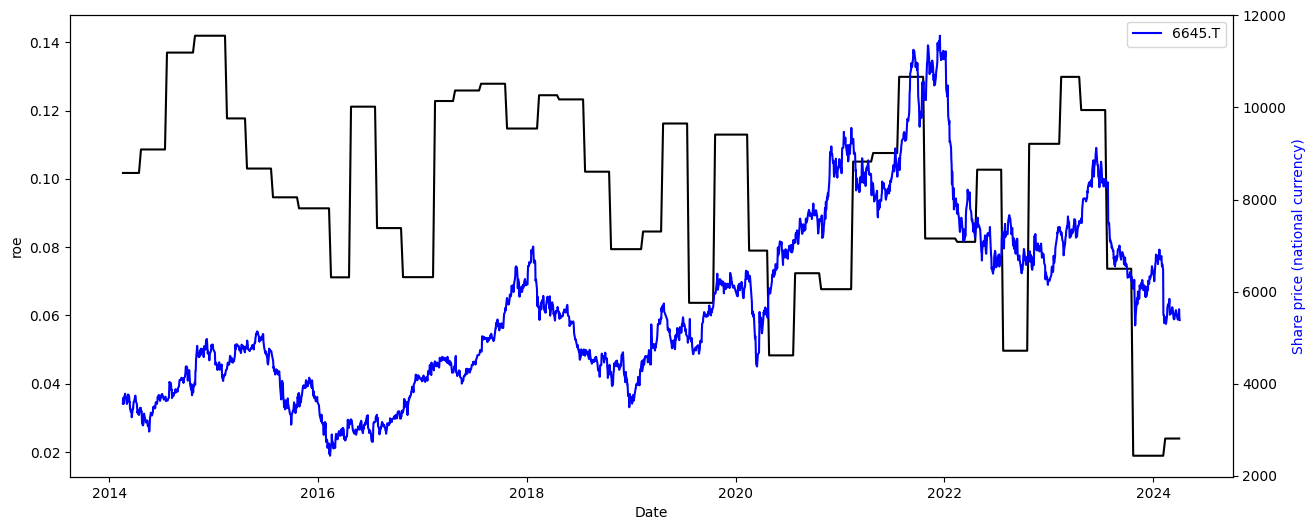

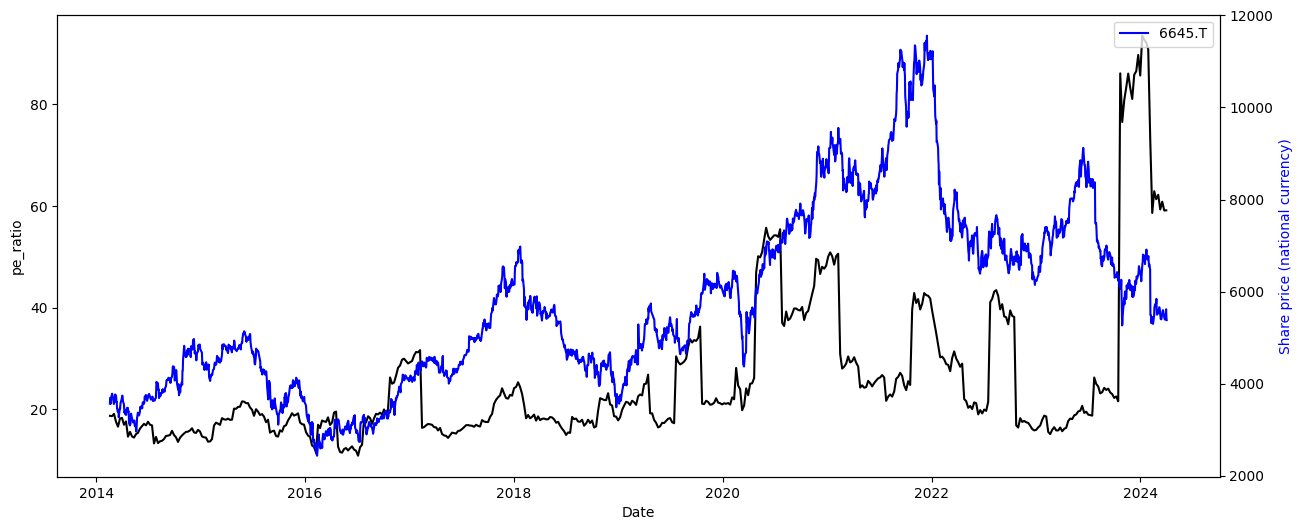

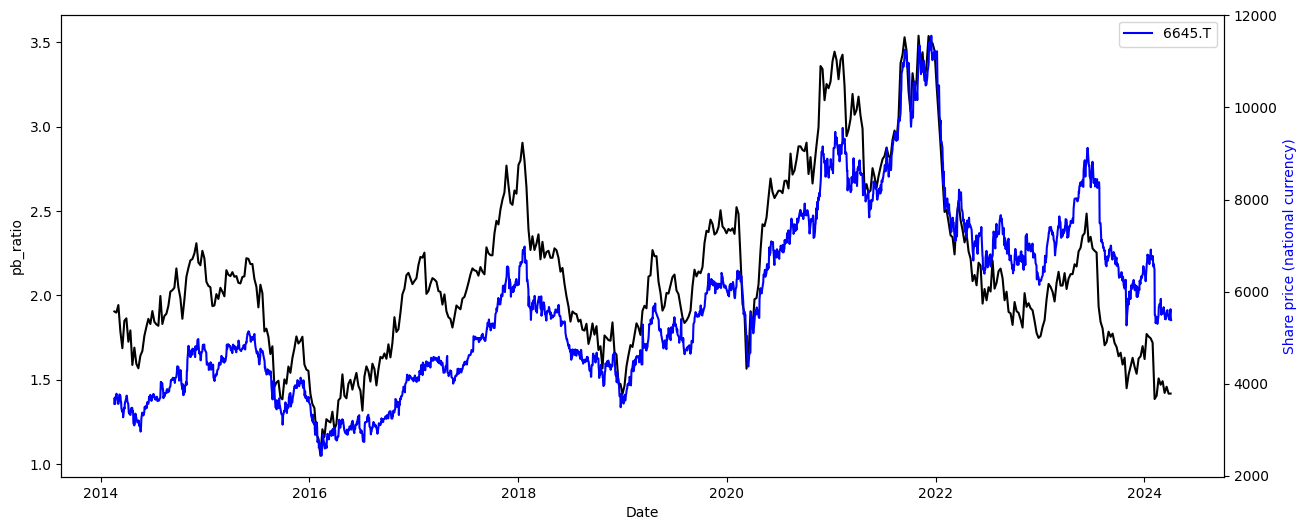

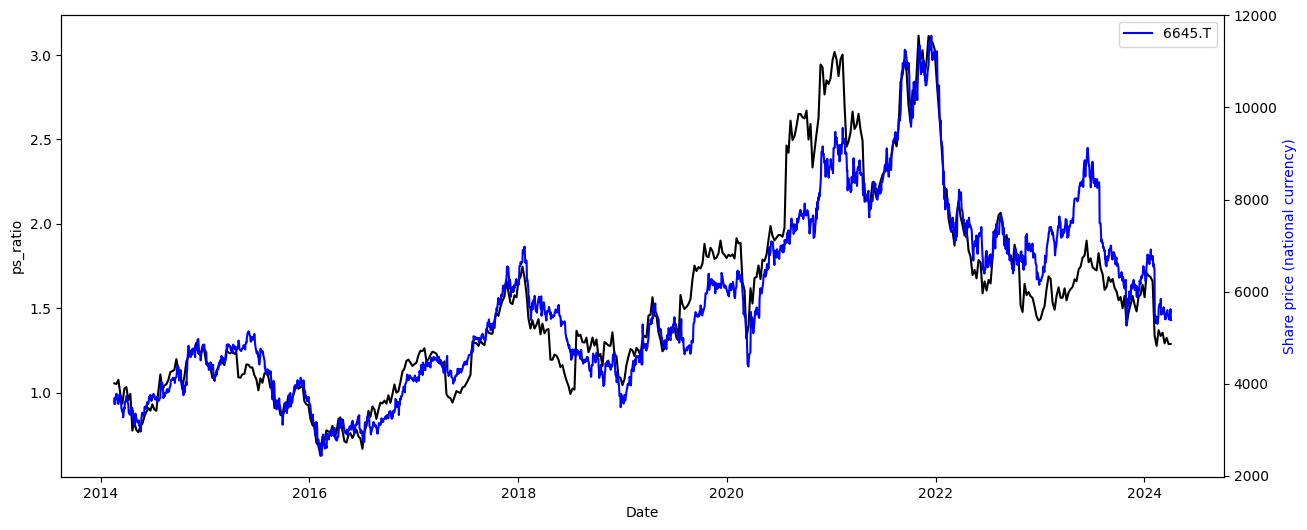

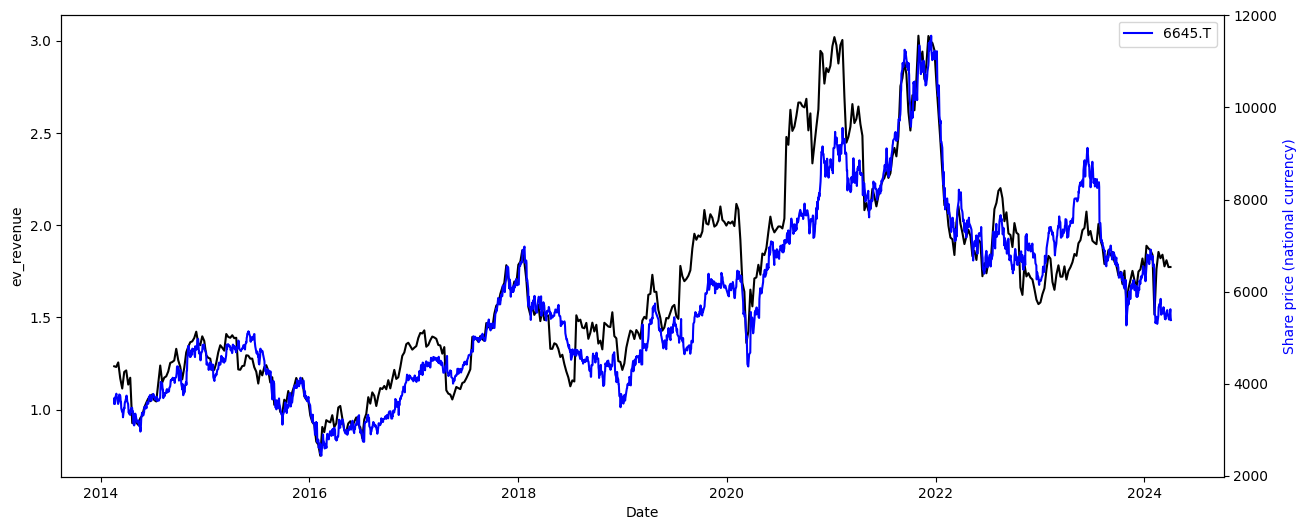

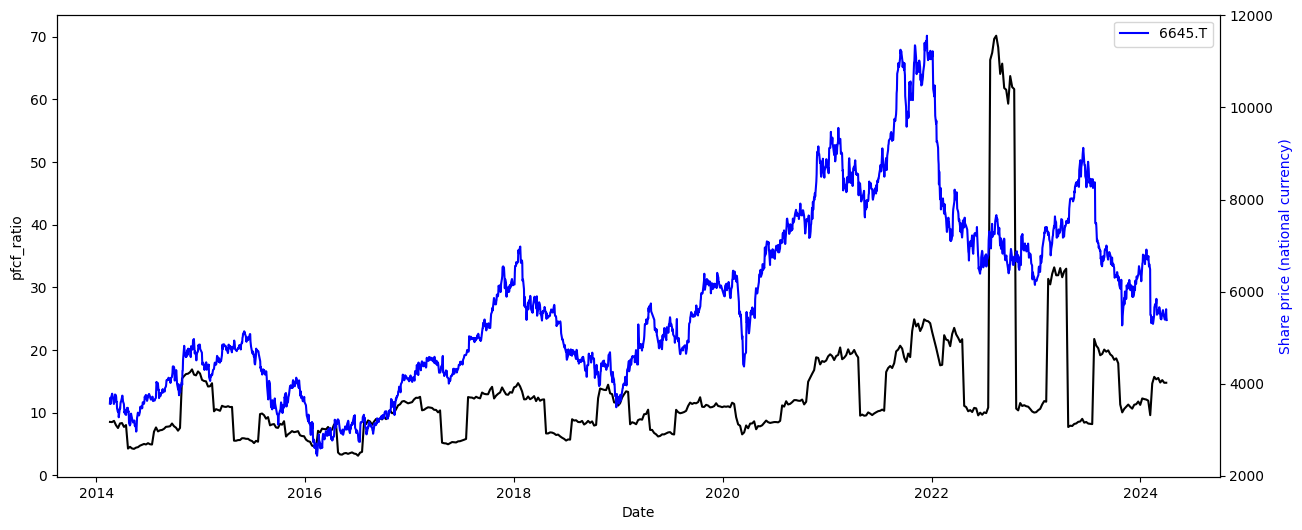

In [18]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

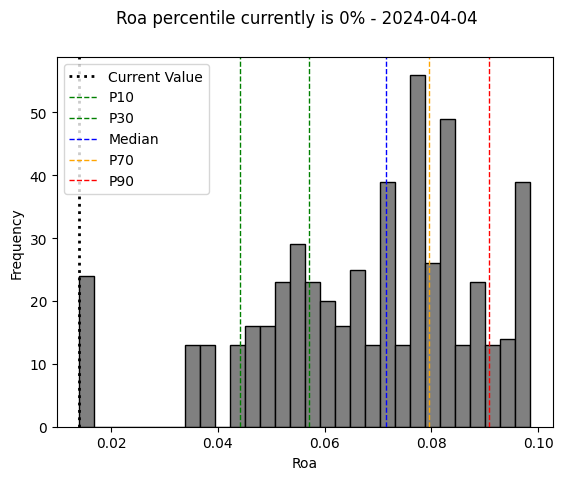

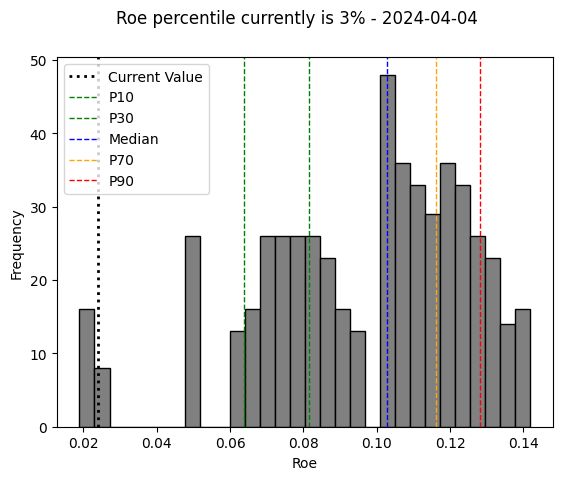

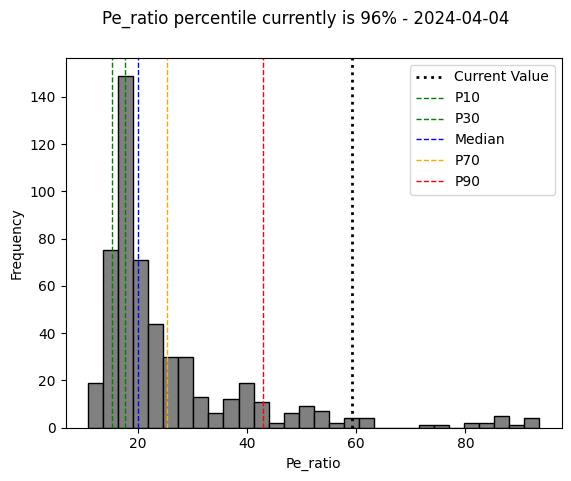

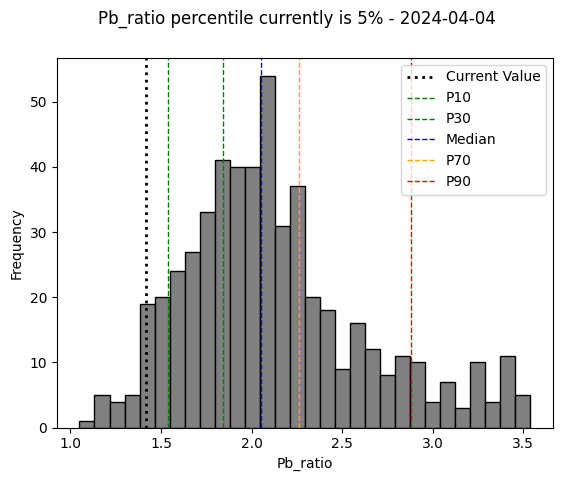

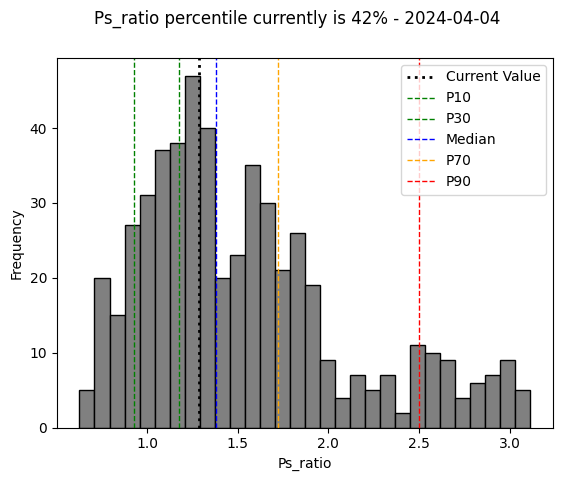

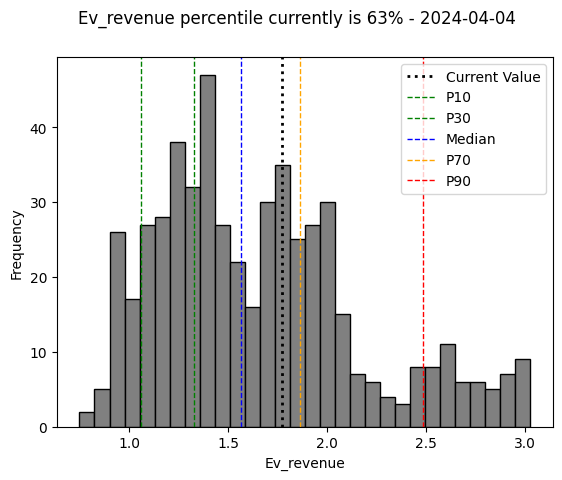

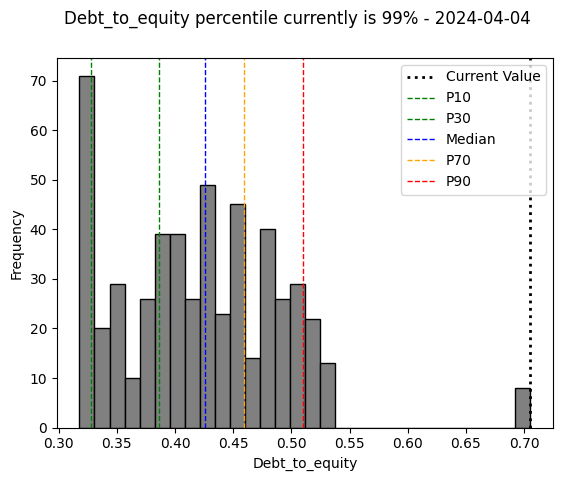

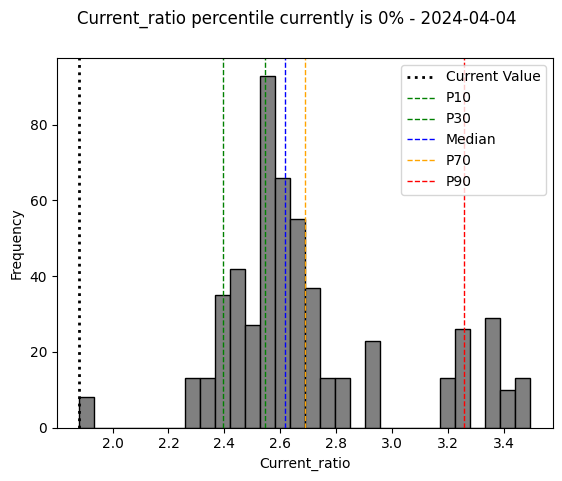

In [19]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[], owned_shares=owned_shares)

## Calculate correlation between value parameters

In [20]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,0.988579,-0.787517,0.185601,-0.114183,-0.165037,-0.001312,-0.009768
roe,0.988579,1.000000,-0.809598,0.124506,-0.208491,-0.255112,0.130959,-0.089466
pe_ratio,-0.787517,-0.809598,1.000000,0.218002,0.458476,0.500212,-0.215557,0.226096
pb_ratio,0.185601,0.124506,0.218002,1.000000,0.877044,0.845725,-0.349728,0.705417
ps_ratio,-0.114183,-0.208491,0.458476,0.877044,1.000000,0.991383,-0.566573,0.743611
ev_revenue,-0.165037,-0.255112,0.500212,0.845725,0.991383,1.000000,-0.518629,0.667405
debt_to_equity,-0.001312,0.130959,-0.215557,-0.349728,-0.566573,-0.518629,1.000000,-0.562351
current_ratio,-0.009768,-0.089466,0.226096,0.705417,0.743611,0.667405,-0.562351,1.000000


8 timestemos have been found!


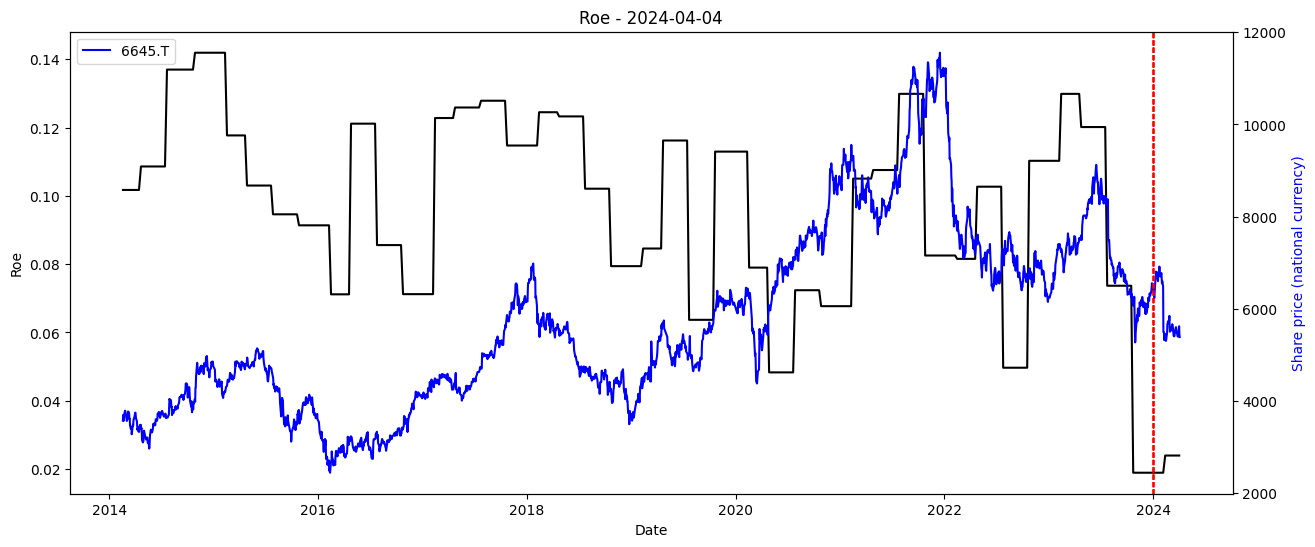

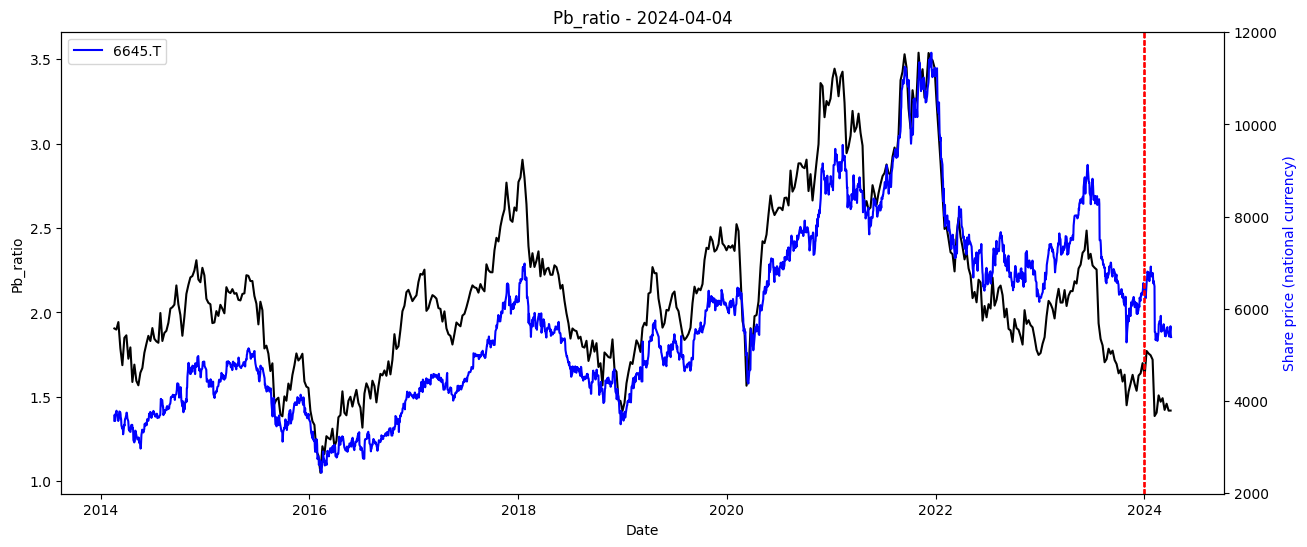

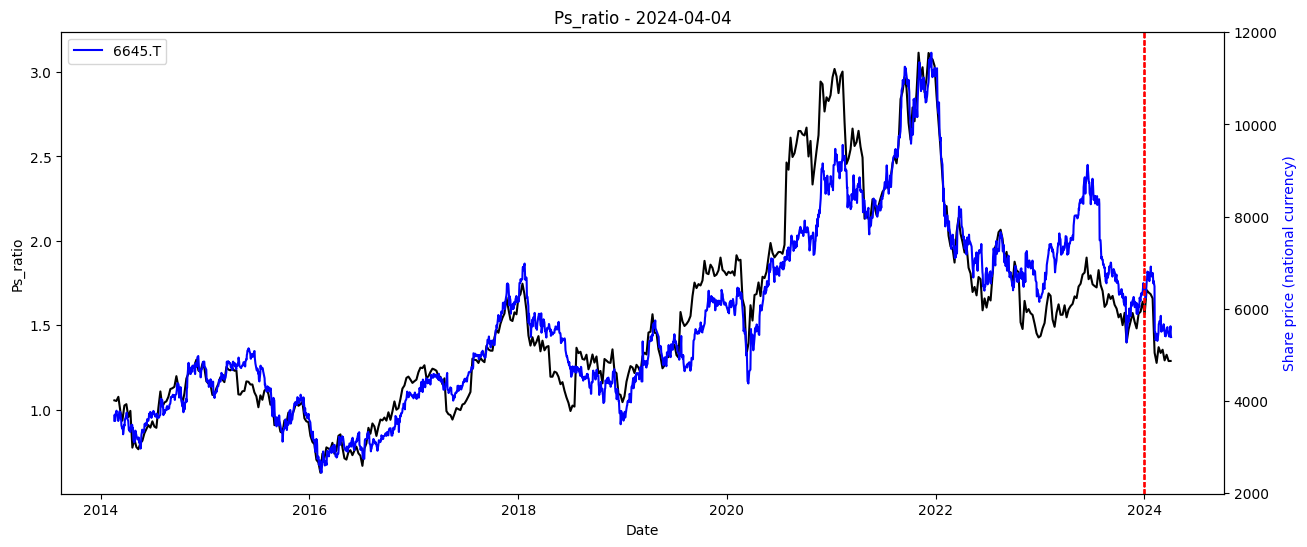

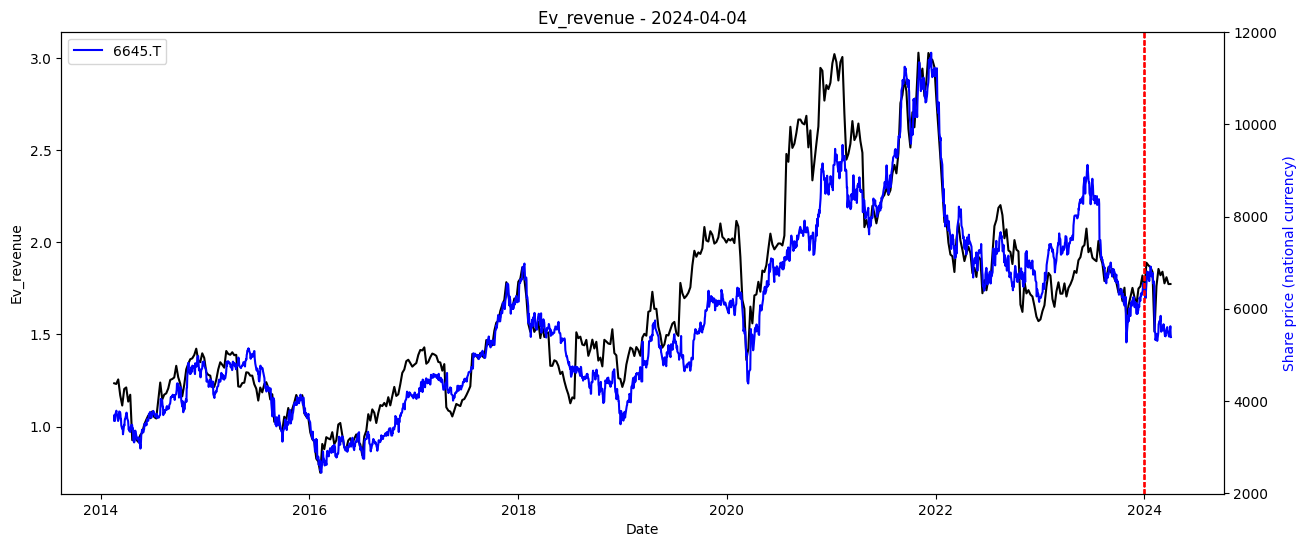

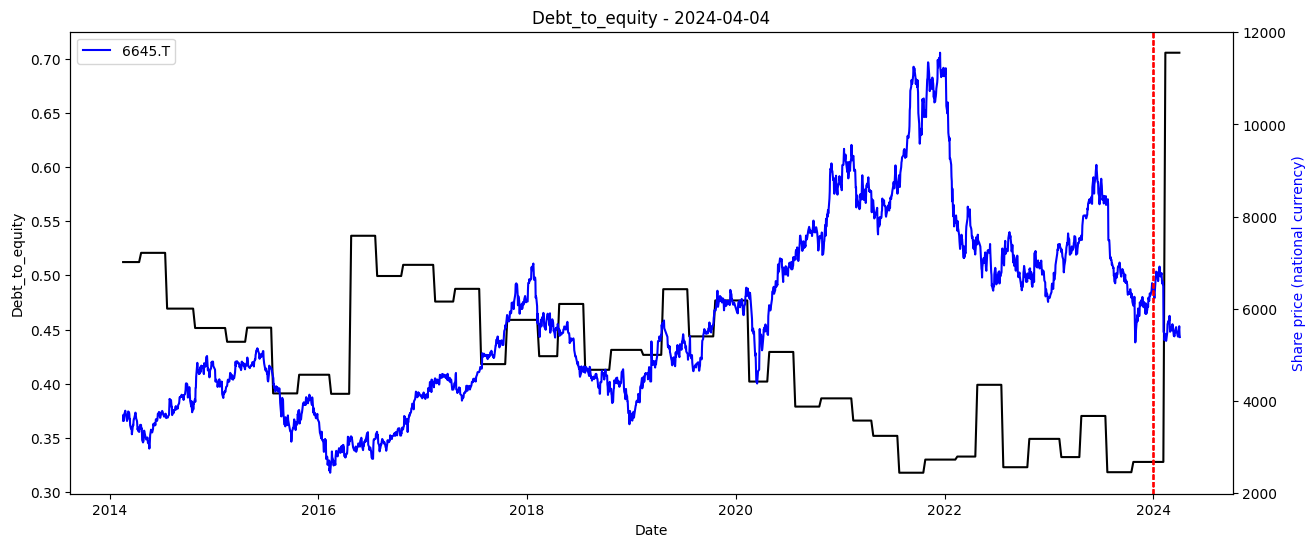

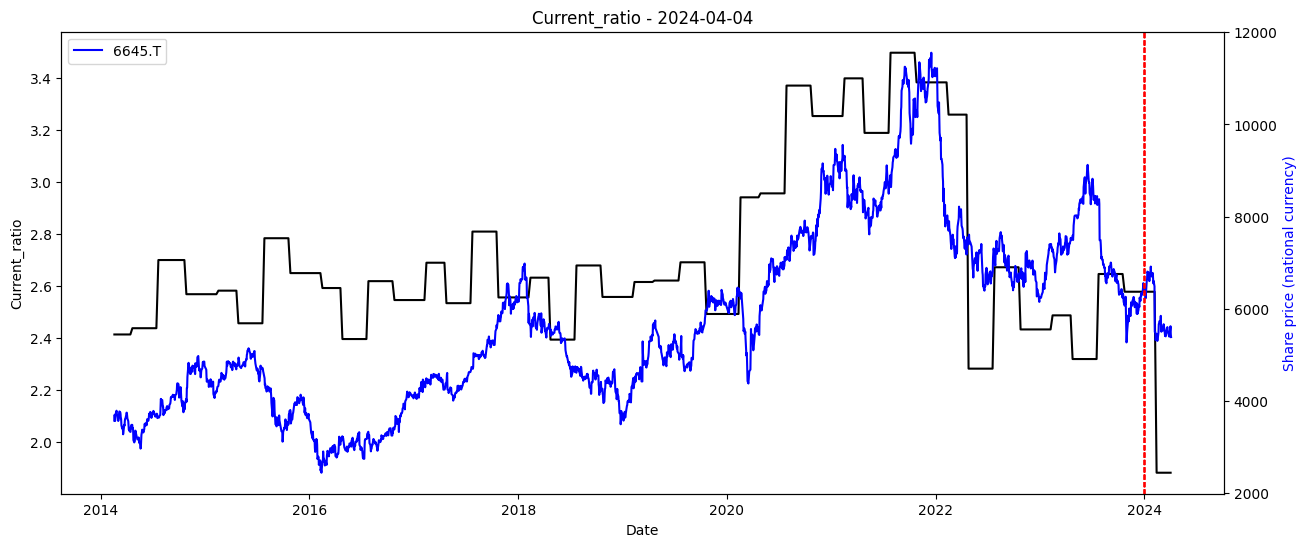

In [21]:
# plot value parameters in time and identify similar events
utils.get_historical_analouges(
    input_df=merged_nat_curr,
    ticker_all_price=ticker_all_price,
    share_name=share_name,
    tolerance=0.2,
    owned_shares=owned_shares
    )